# What is the HRRR run-to-run variability

Root-mean-square differences

In [528]:
%matplotlib inline
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_maps.my_basemap import draw_HRRR_map

In [529]:
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

In [530]:
latlon = get_hrrr_latlon()
lat = latlon['lat']
lon = latlon['lon']

In [531]:
m = draw_HRRR_map()

---

In [532]:
validDATE = datetime(2018, 8, 9, 0) # period of smoke in Spanish Fork
variable = 'GUST:surface'
F = range(19)

In [533]:
# Load all forecast grids for this time
if variable.split(':')[0] == 'UVGRD':
    forecasts = [get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['SPEED'] for f in F]
else:
    forecasts = [get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['value'] for f in F]

---

RMSD between consecutive forecasts

F18-F17, F17-F16, F16-F15, etc.

In [534]:
# Differences of each consecutive forecast (F00-F01, F01-F02, F03-F04, etc.)
differences = np.array([forecasts[i-1]-forecasts[i] for i in F[1:]])

In [535]:
# What is the mean square of the differences between consecutive forecasts?
[('F%02d-F%02d' % (k, k+1), (D**2).mean()) for k, D in enumerate(differences)]

[('F00-F01', 1.9013612),
 ('F01-F02', 2.263678),
 ('F02-F03', 2.7386277),
 ('F03-F04', 2.0491893),
 ('F04-F05', 1.8915138),
 ('F05-F06', 1.841862),
 ('F06-F07', 1.9121011),
 ('F07-F08', 1.9937533),
 ('F08-F09', 2.1002984),
 ('F09-F10', 1.9975909),
 ('F10-F11', 2.6497178),
 ('F11-F12', 2.3375244),
 ('F12-F13', 2.7368765),
 ('F13-F14', 2.7681541),
 ('F14-F15', 3.6493788),
 ('F15-F16', 2.1779778),
 ('F16-F17', 2.295478),
 ('F17-F18', 2.6077793)]

In [536]:
RMSD = np.sqrt(np.mean(differences**2, axis=0))

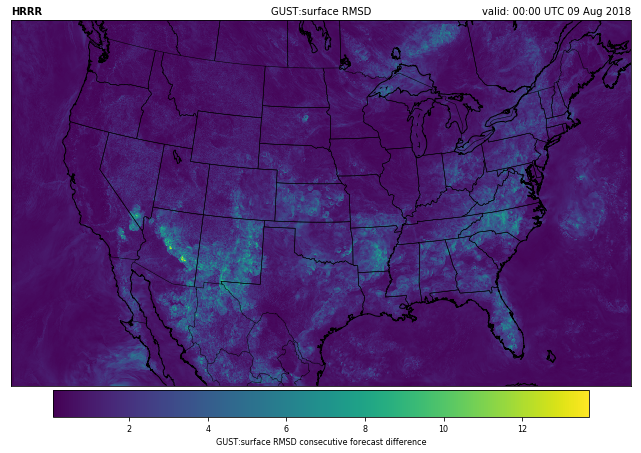

In [537]:
m.pcolormesh(lon, lat, RMSD, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label('%s RMSD consecutive forecast difference' % variable)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

plt.title('HRRR', loc='left', fontweight='semibold')
plt.title('%s RMSD' % variable)
plt.title('valid: %s' % validDATE.strftime('%H:%M UTC %d %b %Y'), loc='right')

plt.savefig('RMSD_%s_consecutive-difference' % variable.replace(":", "-").replace(" ", "-"))

---

RMSD between all forecasts relative to a single forecast

F18-F17, F18-F16, F18-F15, etc.

In [538]:
reference_fxx = 0


In [539]:
# Differences of each consecutive forecast (F18-F17, F18-F16, F18-F15, etc.)
differences_fxx = np.array([forecasts[reference_fxx]-forecasts[i] for i in F])
# NOTE: this includes an array of zeros becuase F06-F06 is zero. We will not include this in our mean.

In [540]:
# What is the mean square of the differences between consecutive forecasts?
[('F%02d-F%02d' % (reference_fxx, k), (D**2).mean()) for k, D in enumerate(differences_fxx)]

[('F00-F00', 0.0),
 ('F00-F01', 1.9013612),
 ('F00-F02', 2.635249),
 ('F00-F03', 3.4018078),
 ('F00-F04', 3.5099921),
 ('F00-F05', 3.6735582),
 ('F00-F06', 3.884892),
 ('F00-F07', 4.1748586),
 ('F00-F08', 4.1095743),
 ('F00-F09', 4.1800733),
 ('F00-F10', 4.438392),
 ('F00-F11', 4.5548983),
 ('F00-F12', 4.862061),
 ('F00-F13', 4.9101996),
 ('F00-F14', 4.8729157),
 ('F00-F15', 4.903347),
 ('F00-F16', 4.96164),
 ('F00-F17', 5.079668),
 ('F00-F18', 5.077599)]

In [541]:
# What is the mean square of the differences between the forecasts from the reference?

# RMSD (excluding the array of 0, F06-F06)
RMSD_fxx = np.sqrt(np.sum(differences_fxx**2, axis=0)/(len(F)-1))


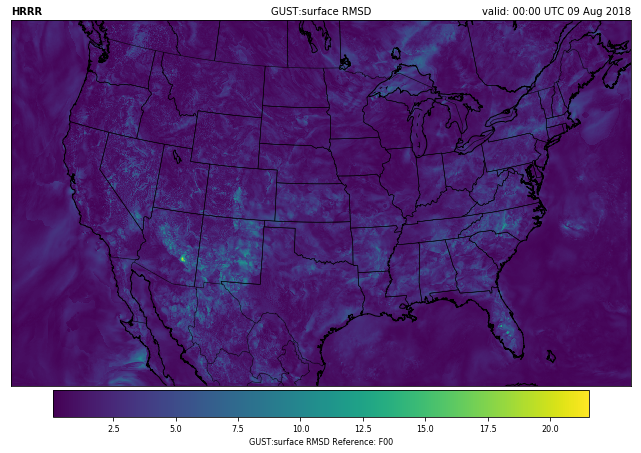

In [542]:
m.pcolormesh(lon, lat, RMSD_fxx, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label('%s RMSD Reference: F%02d' % (variable,reference_fxx))

m.drawcoastlines()
m.drawstates()
m.drawcountries()

plt.title('HRRR', loc='left', fontweight='semibold')
plt.title('%s RMSD' % variable)
plt.title('valid: %s' % validDATE.strftime('%H:%M UTC %d %b %Y'), loc='right')

plt.savefig('RMSD_%s_F%02d' % (variable.replace(":", "-").replace(" ", "-"), reference_fxx))

---

RMSD between consecutive forecasts and all reference hours

F18-F17, F17-F16, F16-F15, etc.
F18-F17, F18-F16, F18-F15, etc.

In [543]:
x, y = np.meshgrid(F, F)

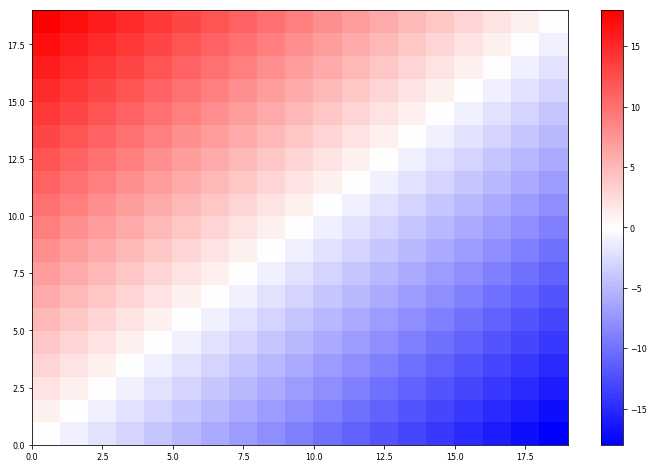

In [544]:
plt.pcolormesh(y-x, cmap='bwr')
plt.colorbar()

In [545]:
print(['F%02d-F%02d' % (i, j) for i in F for j in F if i-j > 0])

['F01-F00', 'F02-F00', 'F02-F01', 'F03-F00', 'F03-F01', 'F03-F02', 'F04-F00', 'F04-F01', 'F04-F02', 'F04-F03', 'F05-F00', 'F05-F01', 'F05-F02', 'F05-F03', 'F05-F04', 'F06-F00', 'F06-F01', 'F06-F02', 'F06-F03', 'F06-F04', 'F06-F05', 'F07-F00', 'F07-F01', 'F07-F02', 'F07-F03', 'F07-F04', 'F07-F05', 'F07-F06', 'F08-F00', 'F08-F01', 'F08-F02', 'F08-F03', 'F08-F04', 'F08-F05', 'F08-F06', 'F08-F07', 'F09-F00', 'F09-F01', 'F09-F02', 'F09-F03', 'F09-F04', 'F09-F05', 'F09-F06', 'F09-F07', 'F09-F08', 'F10-F00', 'F10-F01', 'F10-F02', 'F10-F03', 'F10-F04', 'F10-F05', 'F10-F06', 'F10-F07', 'F10-F08', 'F10-F09', 'F11-F00', 'F11-F01', 'F11-F02', 'F11-F03', 'F11-F04', 'F11-F05', 'F11-F06', 'F11-F07', 'F11-F08', 'F11-F09', 'F11-F10', 'F12-F00', 'F12-F01', 'F12-F02', 'F12-F03', 'F12-F04', 'F12-F05', 'F12-F06', 'F12-F07', 'F12-F08', 'F12-F09', 'F12-F10', 'F12-F11', 'F13-F00', 'F13-F01', 'F13-F02', 'F13-F03', 'F13-F04', 'F13-F05', 'F13-F06', 'F13-F07', 'F13-F08', 'F13-F09', 'F13-F10', 'F13-F11', 'F13-F12'

In [546]:
# Differences between each forecasts (don't double count)
differences_all = np.array([forecasts[i]-forecasts[j] for i in F for j in F if i-j > 0])

In [547]:
RMSD_all = np.sqrt(np.mean(differences_all**2, axis=0))

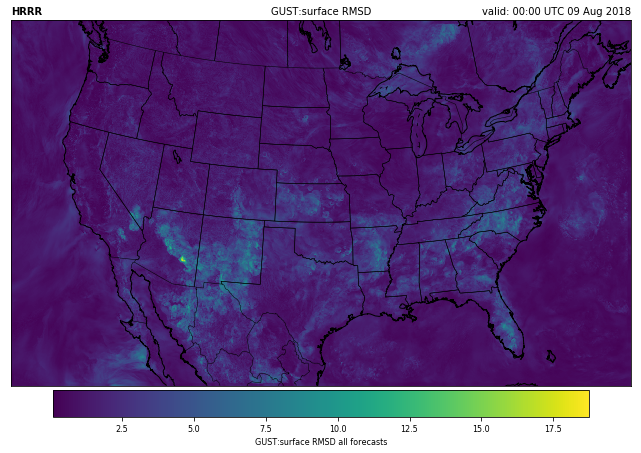

In [548]:
m.pcolormesh(lon, lat, RMSD_all, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label('%s RMSD all forecasts' % variable)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

plt.title('HRRR', loc='left', fontweight='semibold')
plt.title('%s RMSD' % variable)
plt.title('valid: %s' % validDATE.strftime('%H:%M UTC %d %b %Y'), loc='right')
plt.savefig('RMSD_%s_all' % variable.replace(":", "-").replace(" ", "-"))